# Introducing Mechanical Vibrations with a Book Oscillating on a Cup

## Course Information

In the following two resources you can find more detailed information about the 11 week course that this notebook is an introduction to:

- Course website: https://moorepants.github.io/eng122/
- *Resonance* open access digital book (draft): https://moorepants.github.io/resonance/

### Course Learning Objectives

The primary course objectives are (succintly) that students will be able to:

- characteritize vibrations based on measurements from real systems and simulated systems
- create predictive mathematical and computational models of real vibrating systems
- design vibrating systems with desired characteristics using the two previous skills

In this notebook, I will give you a taste of each of these three using a simple real system we can examine in class. Each class session will follow a similar pattern but with new and more complicated systems as we progress. You will be able to complete each step in the entire modeling-analysis-design iterative loop when the course is over.

## Introduction

This notebook introduces a single [degree of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(mechanics) vibratory system: a textbook balancing on a cylindrical coffee cup. The system is implemented as a model that students can interact with in order to visualize its free response and compare the computer simulation to a demonstration in the classroom.

After the completion of this assignment students will be able to:

-   load a specific system
-   view and set parameters (constants, coordinates) on a system
-   create a visualization that depicts the system's configuration
-   compute the system's free response
-   visualize the change in configuration wit respect to the free response
-   interactively adjust the book shape to see the affect on system response
-   understand the concept of natural frequency and its relationship to mass/inertia
-   estimate the period of a sinusoidal vibration from a time series
-   compare a computer simulation result to experimental result

## What are vibrations?

Here we will study a simple vibratory system. A vibrating mechanical system is typically defined as a collection of rigid and flexible objects that interact in a closed envelope. If you set a cylindrical cup on its side and place a book lying flat on top of it, the book will oscillate if initially displaced at a small non-horizontal angle. Note that it oscillates about a horizontal position. This position is called an *equilibrium point*, *equilibrium state*, or *equilibrium configuration* which is a natural position the system comes to when there is no motion. Vibration is formally defined as an *oscillation about an equilibrium*. The video below shows the real system in action:

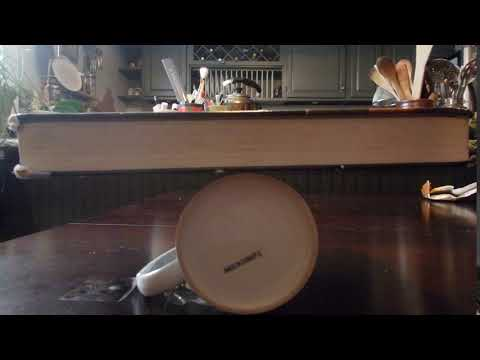

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('B12HbAOKnqI')

During this class, we will examine and explore many different vibratory systems, such as this simple book on a cup system. We will have some live demos, as we are showing now, but in general we will work with computational representations of systems to experiment and learn about the nature of vibration. For example, the following code loads a system that represents the book on a cup. To execute the following Jupyter code cell press the shift and enter key simultaneously:

# Objective 1: Modeling

We will use [Lagrange's method](https://en.wikipedia.org/wiki/Lagrangian_mechanics) of forming the equations of motion of vibrating systems in this class. Lagrange's method is equivalent to the Newton-Euler approach of forming $F=ma$ and $T=I\alpha$ but is often a simpler approach due to the modler, you, only having ot determine the kinetic and potential energy of the system as a whole. Here we will use SymPy to formulate these equations symbolically.

The book oscillates at an angular rate, $\dot{\theta}$, and the magnitude of the velocity of the center of mass of the book can be shown to be $v = \frac{1}{2} \sqrt{\left(d^{2} + 4 r^{2} \theta^{2}\right) \dot{\theta}^{2}}$. The moment of inertia of the book is approximately $\frac{m}{12} \left(d^{2} + l^{2}\right)$.

For the potential energy the height above the center of the circle can be shown to be:

$$h = \left(r + \frac{d}{2}\right) \cos\theta + r \theta \sin\theta$$

Look up the moment of inertia of a rectangle with respect to it's geometric center (also it's center of mass if uniformly dense). https://en.wikipedia.org/wiki/List_of_moments_of_inertia


## Modeling Step 1: Create a simplified free body diagram of the system

This step is not a trivial step, but for the purposes of the introduction we will assume you have come up with a simplified version of the conceptual mechanics that govern the system's motion. In this case there are many simplifying assumptions:

- The book does not slip on the cup, i.e. it rolls without slip on the cups surface.
- The book is a uniformly dense rectangle that only has planar motion.
- The book and the cup surfaces are perfectly shaped geometric entities.
- etc.

Coming up with appropriate assumptions that let you describe the system in the simplest way in terms of what you want to learn about is the essence of **modeling**. It is a skill that takes a lot of practice and you will get to practice this a fair amount in this class. Below you will find a *free body diagram* that can likely capture the essential vibratory motion of this system.

<img src="balancing-book.svg" alt="image" width="600" />

# Modeling Step 2: Write the kinetic and potential energy of the system

## Exercise

Given the magnitude of the velocity of the center of mass of the moving book and the height of the center of mass of the moving book write symbolic expressiosn for the kinetic energy of the system.

The kinetic energy is the sum of the linear:

$$
\frac{1}{2}mv^2
$$

and rotational energy:

$$
\frac{1}{2}\dot{\theta}^2
$$

The potential energy is:

$$
mgh
$$

You will need `sm.sin()` and `sm.cos()`, the symbolic sine and cosine functions.

In [2]:
import sympy as sm
sm.init_printing()

In [3]:
from book_balance import print_eq

Here is an example of how to create symbolic expressions with SymPy. First create a function of time and then some symbols for the constants (mass, geometry, etc).

In [4]:
t = sm.symbols('t')
theta = sm.Function('theta')(t)

Create symbols for the system's constants (mass, geometry, etc.):

In [5]:
d, l, r, m, g = sm.symbols('d, l, r, m, g') 

Now using SymPy functions, i.e. `sm.<function name>()`, you can create and display mathematical equations. Notice that you can take time derivatives with `sm.diff()`:

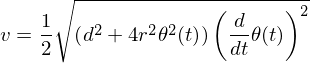

In [6]:
v = sm.sqrt((d**2 + 4 * r**2 * theta**2) * sm.diff(theta, t)**2) / 2
print_eq('v', v)

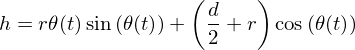

In [7]:
h = (r + d/2) * sm.cos(theta) + r * theta * sm.sin(theta)
print_eq('h', h)

# Exercise

Look up the moment of inertia of a rectangle with respect to it's geometric center (also it's center of mass if uniformly dense). https://en.wikipedia.org/wiki/List_of_moments_of_inertia Create an expression for the  


In [8]:
I = m / 12 * (d**2 + l**2)

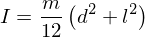

In [9]:
print_eq('I', I)

# Exercise

Write a symbolic expression for the sum of the linear and rotational kinetic energy and store it in the variable `T`.

In [10]:
T = m * v**2 / 2 + I * sm.diff(theta, t)**2 / 2

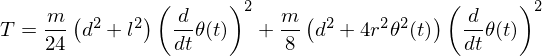

In [11]:
print_eq('T', T)

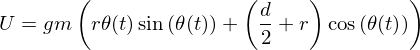

In [12]:
U = m * g * h
print_eq('U', U)

# Modeling Step 3: Form the equations of motion

In [13]:
from book_balance import eom_in_first_order_form   

In [14]:
omega = sm.Function('omega')(t)

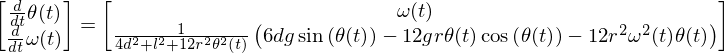

In [15]:
eom_in_first_order_form(T, U, theta, omega, t)

The above mathematical equation represents a set of coupled explicity first order nonlinear ordinary differential equations. The left hand side has the derivatives of the two state variables $\theta$ and $\omega$ and the right hand side are the expressions one can use to calculate the derivatives given the constants (mass, geometry, etc) and the state variables at a given instance of time.

This is a **mathematical model** that can predict the motion of the system and is derived from our conceptual model which is described with the **free body diagram**.

# Objective 2: Analysis

## Analysis Step 1: Visualize the System's Configuration

## Step Visualizing the Configuration of the System

It is often very helpful to visualize a system's configuration. In this case we need a two dimensional drawing similar to the diagram above. The package `matplotlib` provides "patch" objects that represent a circle and a rectangle that should be able to make a reasonable diagram. First import these functions:

In [16]:
from book_balance import BookCupSystem

In [17]:
sys = BookCupSystem()

In [31]:
%matplotlib notebook

<IPython.core.display.Javascript object>


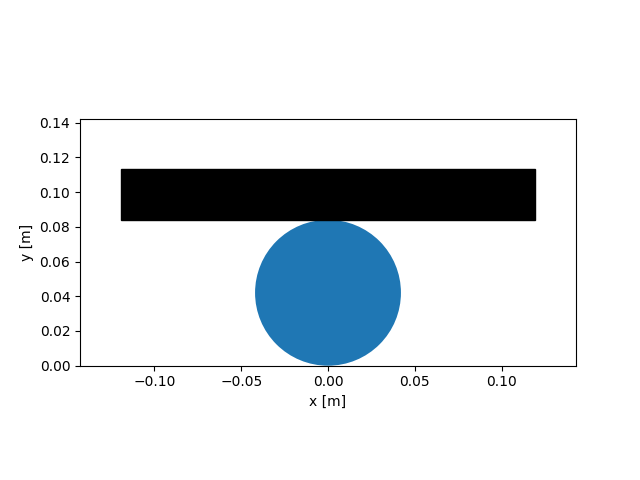

In [33]:
sys.plot_configuration();

`sys` is now a new system object that you can interact with. This system has many variables and functions associated with it. You can see what the system has and can do by using the Python dot notation. Type `sys.` and press the tab key to see a list of all the variables and functions that are associated with this system.

## Constants

One thing that systems have are different constants, for example this system has geometry, such as the book's thickness and length and the cup's radius. The book also has a mass and, in this case, an underlying assumption is that the book is uniformly dense. Note that all of these do not change with time, i.e. they are constant. You can view all of the constants, which are stored in a Python dictionary by typing:

In [ ]:
sys.constants

A Python dictionary maps keys, in this case the constant's names, to values, the numerical values you'd like to assign to the constant. For example the key `'thickness'` is associated with a value `0.029`. An individual constant's value can be accessed by using square brackets:

sys.constants['r']

You can set the values of the constants as such:

sys.constants['l'] = 0.184  # m, short side of book

*Note that you will be responsible for ensuring that the units are consistent and that all angles should be in radians.* Overwrite the `sys` variable by loading the system again to get back the default constants.

sys.constants['l'] = 0.238

All systems will have different sets of constants. There is no unique way to define the constants either. For example, we could have chosen area and one linear dimension instead of three linear dimensions. This system could also have more constants, for example what if you were on the moon? Maybe the acceleration due to gravity should be an explicit constant. Or what if the book to cup connection was very slippery? Maybe the coefficient of friction would be a specific constant. It is important to note that the system constants, as we've defined here, are all constant with respect to time.

In [43]:
## Coordinates

There are other system values of interest too. Another very important type are those that vary with time.

> **Exercise**: What might be the time varying parameters of this system?

There are are an infinite number of time varying parameters, but it is often preferable to choose a uniquely simple set of time varying parameters, often called *generalized coordinates*. These coordinates define the **configuration** of the system. In our case, the vertical and horizontal location of the book's mass center could uniquely describe the configuration of the system (if the book can't slip on the cup). But a better choice would be to use the single time varying angle of the books surface relative to horizontal to define the configuration.

The angle of the book is thus a generalized coordinate because no fewer number of time varying parameters can possibly be used to describe the configuration. For simple systems, the number of generalized coordinates corresponds to the number of *degrees of freedom* of a system. The degrees of freedom are the number of independent parameters that define the configuration. The non-slipping book on a cup has 1 degree of freedom which is described by the single generalized coordinate, the book's angle. The system's generalized coordinates can be accessed as such:

SyntaxError: invalid syntax (<ipython-input-43-0a46b10c29f6>, line 3)

In [29]:
sys.coordinates

sys.coordinates['theta']

_SingleDoFCoordinatesDict([('theta', 0.0)])

## Analysis Step 1: Simulating the System's Motion

# Exercise

Write a Python function that computes the derivatives of the two state variables.

```python
def rhs(theta, omega, d, l, r, g):
    thetadot = # write your expression here
    omegadot = # write your expression here
    return thetadot, omegadot
```

Make sure to use NumPy functions because this should work with floating point numbers. You will likely need `np.sin()` and `np.cos()`.

In [18]:
import numpy as np

In [19]:
np.sin(5.0)

In [20]:
def rhs(theta, omega, d, l, r, g):
    thetadot = omega
    omegadot = (6 * d * g * np.sin(theta) - 12 * g * r * theta * np.cos(theta) -
                12 * r**2 * omega**2 * theta) / (4 * d**2 + l**2 + 12 * r**2 * theta**2)
    return thetadot, omegadot

Test the function:

In [21]:
rhs(5.0, 2.1, 6.0, 7.0, 12.0, 9.8)

If you used all NumPy compatible functions it should also work with arrays:

In [22]:
rhs(5.0 * np.ones(2), 3.6 * np.ones(2), 6.0, 7.0, 12.0, 9.8)

(array([ 3.6,  3.6]), array([-2.63439331, -2.63439331]))

In [23]:
sys.diff_eq_func = rhs

In [24]:
sys.diff_eq_func

<function __main__.rhs>

The line above loads (imports) the command, `BookOnCupSystem`, from the appropriate resonance package. This command can create systems that behave like the live demo. To create a new system append parentheses the command and assign the result that it returns it to a variable called `sys`, execute the following cell:

And for nice interactive plotting in the Jupyter notebook, use this command to turn it on:

Just as we did with the measurement functions, you can create a function that generates the matplotlib figure using the system's various constants, coordinates, and measurements:

A system can have a single configuration plot function and you let the system know about it by assigning it to the `config_plot_func` variable.

Now, have a look at the configuration plot by calling the function `plot_configuration()` :

> **Exercise:** Change the system's constants and the book angle and see how the plot reflects these changes.

## Free Response

Now that we have a system with defined constant parameters we can make it vibrate. There are two ways to create this motion: apply perturbing forces to the system or set the coordinate to an initial angle other than the equilibrium angle. We will do the later here. The resulting motion is called the *free response* of the system, meaning that no external forces are causing the motion. To simulate the free response of the system, some values of time are needed. In this case a final time value, effectively the duration, is passed into the `free_response()` function. First, set the initial angle of the book and then call `free_repsonse()`, storing the returned result in a variable named `trajectories` :

In [34]:
sys.coordinates['theta'] = np.deg2rad(1)
trajectories = sys.free_response(5.0)

This creates what is called a [data frame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Data frames are defined in the [Pandas](http://pandas.pydata.org/) Python package and are one of the most common Python data types. They are essentially a 2D table with labels for each column and an index for each row. In our case the index is the time value and the columns are the values of the coordinates and the measurements at that particular time:

In [35]:
type(trajectories)

pandas.core.frame.DataFrame

In [36]:
trajectories

,omega,theta,theta_acc,bottom_left_x,bottom_left_y
time,,,,,
0.00,0.000000,0.017453,-0.941272,-0.118982,0.086083
0.01,-0.009404,0.017406,-0.938737,-0.118982,0.086078
0.02,-0.018758,0.017265,-0.931146,-0.118982,0.086061
0.03,-0.028010,0.017031,-0.918539,-0.118983,0.086033
0.04,-0.037112,0.016706,-0.900984,-0.118983,0.085994
0.05,-0.046014,0.016290,-0.878574,-0.118984,0.085944
0.06,-0.054668,0.015786,-0.851430,-0.118985,0.085884
0.07,-0.063027,0.015197,-0.819697,-0.118986,0.085813
0.08,-0.071047,0.014527,-0.783545,-0.118987,0.085733


The data frames have useful plotting functions associated with them, so it is rather easy to plot the various coordinates and measurements versus time:

<IPython.core.display.Javascript object>


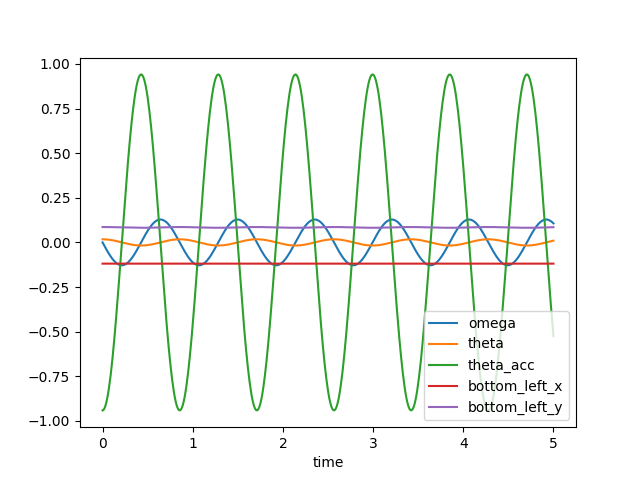

In [37]:
trajectories.plot();

It is often a little clearer if each column is in a subplots, especially if they have different units, as these do:

<IPython.core.display.Javascript object>


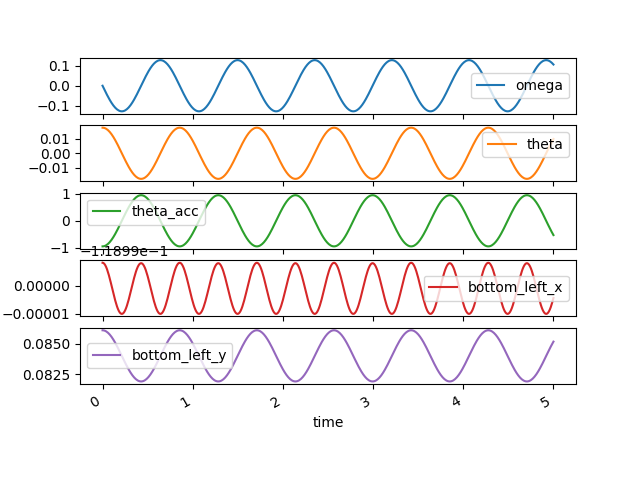

In [38]:
trajectories.plot(subplots=True);

> **Exercise:** Create the free response of the system with different initial coordinate values and parameter values.
>
> -   Does the simulation always work, if not what doesn't work? *Hint: try a tall stack of books, can you find a stack height that is significant?*
> -   What mathematical function can be used describe the change in the book angle?
> -   Why does the book corner x position seem to oscillate faster?

## Animate The Motion

Now that we we have a time varying response, we can animate the configuration figure to visualize how the system moves. There is one minor change that needs to be made to the configuration plot function first. We need to make sure that it also returns any of the objects that change with time. Update the function by add the `Rectangle` as a second returned value:

Now, an animation update function can be created which updates the bottom left corner's x and y coordinate at each time step. The last argument in the function signature must be the object(s) that changes.

Lastly, add this function to the system:

The visualization can now be animated with:

<IPython.core.display.Javascript object>


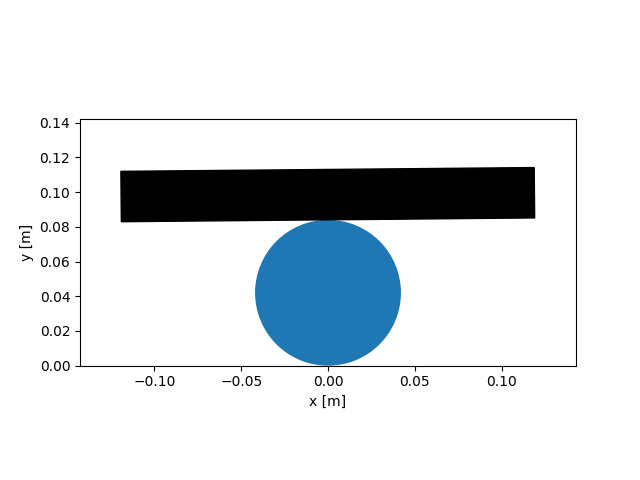

In [41]:
sys.animate_configuration(interval=8)

<IPython.core.display.Javascript object>


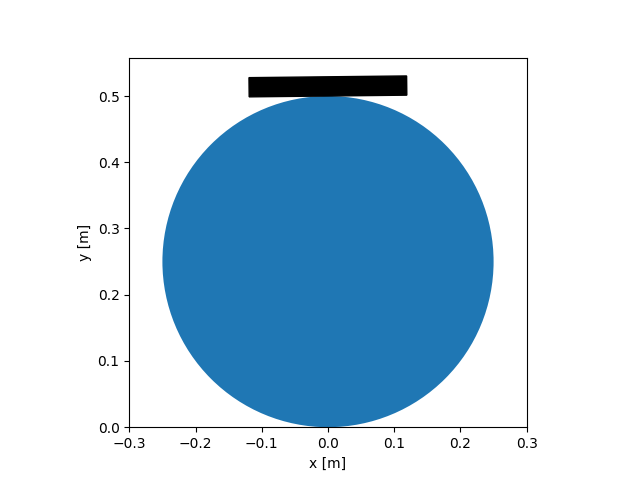

In [42]:
sys.constants['r'] = 0.25
traj = sys.free_response(5.0)
sys.animate_configuration()

## Time Series Analysis

Now that we have some data produced from the simulation we can see how it compares to what we can measure in real life.

> **Exercise:** Either using the video of the oscillation or the demo available in the classroom, count the number of oscillations in a few seconds and compute the period of the oscillation.
>
> **Exercise:** From the above plots you can see that the oscillation is periodic and sinusoidal. Using your program, create a function that calculates the period of the oscillations to three significant figures when the initial book angle is 2 degrees. Compare the period predicted by the system to the period measured in class. You can also compare it to the value given from `sys.period()`.
>
> *Hint: Look for sign changes with np.sign(), use boolean indexing to extract important times, and finally np.diff() and np.mean() can be useful for finding the delta times and averaging. Note that np.diff() returns one fewer item in the array it operates on.*

> **Exercise:** Plot the period versus change in mass, length, and radius. Is there anything interesting about these plots? Explain you interpretations in a markdown cell.